# Question 1

In [ ]:
import math
import matplotlib.pyplot as plt
from functionLibrary import newRaph


h = 0.00001 #defining the h that will be used to calculate first derivative of y using first principle



y = lambda x: 5.95*x - 5.95*0.05422 + (6.254/x) - (6.254*0.05422/x**2) - 24.63 #defining the function
dy = lambda x: (y(x+h)-y(x-h))/(2*h) #defining the first derivative of the function using first principle


v_0 = 0.0821*300/5.95 #using ideal gas equation here
print("From the ideal gas equation, the initial volume is given my: ", v_0)
x, n = newRaph(y, dy, v_0, h, 100)
print("The correct volume using the van-der Walls equation is", x) #printing the results

# Question 2

In [11]:
#importing the required librabries and functions

import math
from functionLibrary import simpson

y = lambda x: math.exp(-x**2/16)/(math.sqrt(x**2+(9/4))) #defining the mathematical function to be integrated

answer = (simpson(-1, 3, 12, y))

print("The potential at height 1.5 m above the point 1 m away from x = 0 is ",answer)


The potential at height 1.5 m above the point 1 m away from x = 0 is  1.8728664575240423


# Question 3

In [12]:
import math
from functionLibrary import linear_fitting

matrix = open("esem_fit1.dat", "r+")
x = []
y = []

for row in matrix:
    e1 = row.split()
    x.append(float(e1[0]))
    y.append(float(e1[1]))


#part(i)
y1 = []
for i in range(len(y)):
    y1.append(math.log(y[i]))
m, c, r = linear_fitting(x, y1)
alpha = m
sigma0 = math.exp(c)
print("In part-i, the values of alpha and sigma_0 are: " + str(alpha) + ' and ' + str(sigma0))
print('The r value is: ' + str(r))
#part(ii)
x2 = []
y2 = []
for i in range(len(x)):
    x2.append(math.log(x[i]))
    y2.append(math.log(y[i]))
m,c,r = linear_fitting(x2,y2)
alpha = m 
sigma0 = math.exp(c)
print("In part-ii, the values of alpha and sigma_0 are: " + str(alpha) + ' and ' + str(sigma0))
print('The r value is: ' + str(r))

In part-i, the values of alpha and sigma_0 are: -0.09716764829979369 and 0.4620483117887274
The r value is: -0.9231412967039299
In part-ii, the values of alpha and sigma_0 are: -0.43849688288816524 and 0.5455160765174949
The r value is: -0.964482406736273


# Question 4

In [13]:
from functionLibrary import polyfit_inverse, matrixProduct, determinant

matrix = open("esem_fit2.dat", "r+")


x = []
y = []

for row in matrix:
    e1 = row.split()
    x.append(float(e1[0]))
    y.append(float(e1[1]))

#defining the sums in Y
sum_hr0 = 0
sum_hr1 = 0
sum_hr2 = 0
for i in range(len(x)):
    sum_hr0 = sum_hr0 + y[i]*x[i]**0
for i in range(len(x)):
    sum_hr1 = sum_hr1 + y[i]*x[i]**1
for i in range(len(x)):
    sum_hr2 = sum_hr2 + y[i]*x[i]**2

Y = [[sum_hr0], [sum_hr1], [sum_hr2]]


#defining the suns in X
sum_r0 = 0
sum_r1 = 0
sum_r2 = 0
sum_r3 = 0
sum_r4 = 0
for i in range(len(x)):
    sum_r0 = sum_r0 + x[i]**0
for i in range(len(x)):
    sum_r1 = sum_r1 + x[i]**1
for i in range(len(x)):
    sum_r2 = sum_r2 + x[i]**2
for i in range(len(x)):
    sum_r3 = sum_r3 + x[i]**3
for i in range(len(x)):
    sum_r4 = sum_r4 + x[i]**4

X = [[sum_r0, sum_r1, sum_r2], [sum_r1, sum_r2, sum_r3], [sum_r2, sum_r3, sum_r4]]


print("If determinant is non-zero, inverse exists. The determinant of X is: ")

det = determinant(X)

if det != 0:
    print("Therefore, inverse exists, we can fit the polynomial.")
else:
    print("Inverse does not exist, we cannot fit the polynomial!")



If determinant is non-zero, inverse exists. The determinant of X is: 
747216961536.0009
Therefore, inverse exists, we can fit the polynomial.


In [3]:
from functionLibrary import polyfit_inverse, matrixProduct

matrix = open("esem_fit2.dat", "r+")


x = []
y = []

for row in matrix:
    e1 = row.split()
    x.append(float(e1[0]))
    y.append(float(e1[1]))

#defining the sums in Y
sum_hr0 = 0
sum_hr1 = 0
sum_hr2 = 0
for i in range(len(x)):
    sum_hr0 = sum_hr0 + y[i]*x[i]**0
for i in range(len(x)):
    sum_hr1 = sum_hr1 + y[i]*x[i]**1
for i in range(len(x)):
    sum_hr2 = sum_hr2 + y[i]*x[i]**2

Y = [[sum_hr0], [sum_hr1], [sum_hr2]]


#defining the suns in X
sum_r0 = 0
sum_r1 = 0
sum_r2 = 0
sum_r3 = 0
sum_r4 = 0
for i in range(len(x)):
    sum_r0 = sum_r0 + x[i]**0
for i in range(len(x)):
    sum_r1 = sum_r1 + x[i]**1
for i in range(len(x)):
    sum_r2 = sum_r2 + x[i]**2
for i in range(len(x)):
    sum_r3 = sum_r3 + x[i]**3
for i in range(len(x)):
    sum_r4 = sum_r4 + x[i]**4

X = [[sum_r0, sum_r1, sum_r2], [sum_r1, sum_r2, sum_r3], [sum_r2, sum_r3, sum_r4]]

X_inv = polyfit_inverse(X)

P = matrixProduct(X_inv, Y)

r_highest = -(P[1][0])/(2*P[2][0])

h_highest = P[0][0] + P[1][0]*r_highest + P[2][0]*(r_highest)**2

print("The maximum height is attained at r =", r_highest)
print("The maximum height attained is h =", h_highest, "m")



The maximum height is attained at r = 41.01216004172983
The maximum height attained is h = 53.0935263701982 m


# Question 5

x at T= 100  is the 443rd element of the X-values.
4.42999999999995


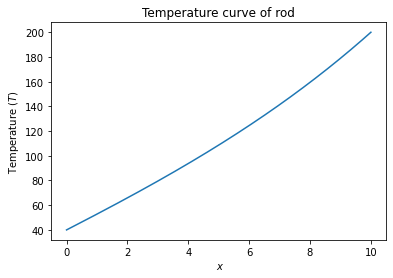

In [2]:
import matplotlib.pyplot as plt
from functionLibrary import runge_kutta
from functionLibrary import lagrange_interpolation
from functionLibrary import shooting_method


# def shooting_method(d2ydx2, dydx, x0, y0, xf, yf, z_guess1, z_guess2, step_size, tol=1e-6):
# this is func for d2y/dt2 =func
def d2ydt2(t, y, z):
    return -0.01*(20-y)
# z = dy/dt
def dydt(t, y, z):
    return z

# Defining boundary values
t_initial = 0
t_final = 10
y_initial = 40
y_final = 200

t, y, z = shooting_method(d2ydt2, dydt, t_initial, y_initial, t_final, y_final, 10, 100, step_size=0.01)
print("x at T= 100  is the 443rd element of the X-values.") #this can be improved by changing step-size
print(t[443])
plt.plot(t,y)
plt.xlabel(" $x$")
plt.ylabel("Temperature $(T)$")
plt.title("Temperature curve of rod")
plt.show()